In [1]:
import numpy as np
import pandas as pd
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [2]:
od.download("https://www.kaggle.com/datasets/swaroopmeher/boston-weather-2013-2023")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anncandle
Your Kaggle Key: ········


100%|███████████████████████████████████████| 48.7k/48.7k [00:00<00:00, 613kB/s]

# Обработка пропусков в числовых данных

In [2]:
weather = pd.read_csv("boston-weather-2013-2023/boston_weather_data.csv")

In [3]:
def_weather = weather.copy()

Загрузили датасет, содержащий данные о погоде в Бостоне.
Датасет содержит следующие столбцы:
* time - дата в строковом формате
* tavg - средняя температура воздуха в градусах Цельсия
* tmin - минимальная температура воздуха в градусах Цельсия
* tmax - максимальная температура воздуха в градусах Цельсия
* prcp - общее количество осадков за сутки в миллиметрах
* wdir - Среднее направление ветра в градусах
* wspd - Средняя скорость ветра в километрах в час
* pres - Среднее давление воздуха на уровне моря в гектопаскалях

In [4]:
weather.shape

(3653, 8)

In [5]:
weather.dtypes

time     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
wdir    float64
wspd    float64
pres    float64
dtype: object

In [6]:
weather.isnull().sum()

time      0
tavg      1
tmin      0
tmax      0
prcp      0
wdir    587
wspd      0
pres    161
dtype: int64

In [7]:
weather.head()

,time,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2013-03-01,3.2,1.1,5.0,0.0,342.0,15.1,1002.7
1,2013-03-02,3.1,1.1,5.6,0.0,307.0,14.4,1004.2
2,2013-03-03,2.6,0.6,6.1,0.0,NaN,14.4,1002.6
3,2013-03-04,1.8,-0.6,5.0,0.0,303.0,28.1,1003.0
4,2013-03-05,2.9,0.0,6.1,0.0,NaN,16.6,1013.5


In [8]:
# удалим одну строку с пропущенной средней температурой
weather = weather.dropna(subset=["tavg"])


In [9]:
weather.isnull().sum()

time      0
tavg      0
tmin      0
tmax      0
prcp      0
wdir    586
wspd      0
pres    160
dtype: int64

In [10]:
def imputer_func(dset, column, strat):
  imputer = SimpleImputer(strategy=strat, missing_values=np.nan)
  imputer = imputer.fit(dset[[column]])
  return imputer.transform(dset[[column]])


In [11]:
weather['wdir'] = imputer_func(weather, 'wdir', 'most_frequent')

In [12]:
weather['pres'] = imputer_func(weather, 'pres', 'most_frequent')

In [13]:
weather.isnull().sum()

time    0
tavg    0
tmin    0
tmax    0
prcp    0
wdir    0
wspd    0
pres    0
dtype: int64

In [14]:
# после обработки пропусков
#weather.describe()

<Axes: xlabel='wdir', ylabel='Count'>

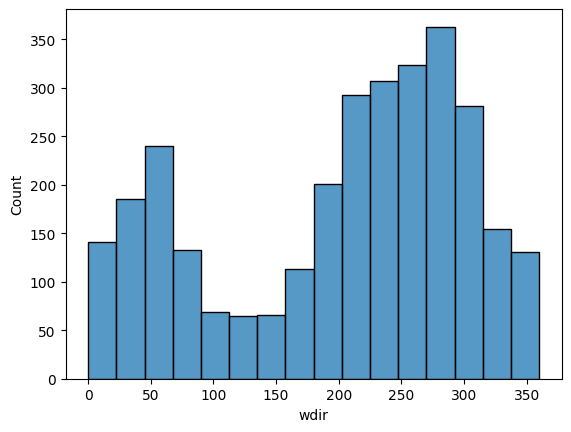

In [15]:
sns.histplot(data=def_weather, x = "wdir")

<Axes: xlabel='wdir', ylabel='Count'>

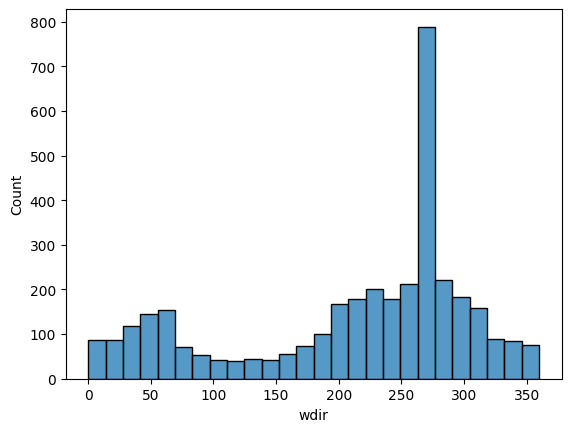

In [16]:
sns.histplot(data=weather, x = "wdir")

<Axes: xlabel='pres', ylabel='Count'>

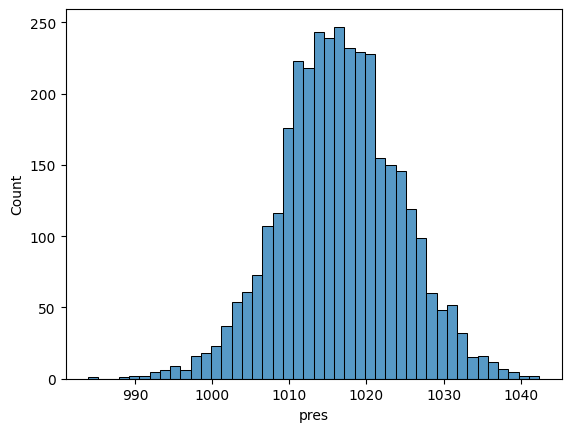

In [17]:
sns.histplot(data=def_weather, x = "pres")

<Axes: xlabel='pres', ylabel='Count'>

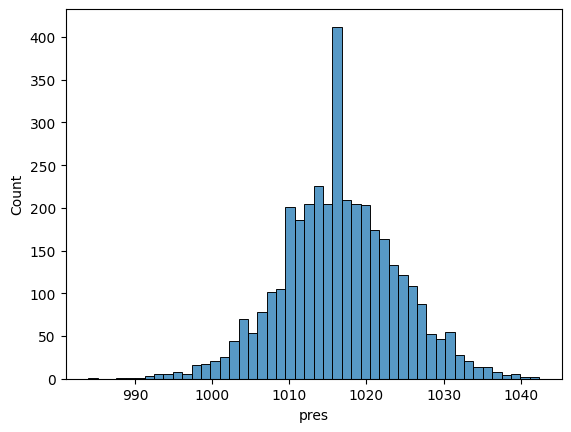

In [18]:
sns.histplot(data=weather, x = "pres")

In [19]:
weather.head()

,time,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,2013-03-01,3.2,1.1,5.0,0.0,342.0,15.1,1002.7
1,2013-03-02,3.1,1.1,5.6,0.0,307.0,14.4,1004.2
2,2013-03-03,2.6,0.6,6.1,0.0,271.0,14.4,1002.6
3,2013-03-04,1.8,-0.6,5.0,0.0,303.0,28.1,1003.0
4,2013-03-05,2.9,0.0,6.1,0.0,271.0,16.6,1013.5


# Преобразование категориальных признаков в числовые

In [79]:
od.download("https://www.kaggle.com/datasets/residentmario/ramen-ratings")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anncandle
Your Kaggle Key: ········


100%|███████████████████████████████████████| 39.8k/39.8k [00:00<00:00, 726kB/s]

In [68]:
ramen = pd.read_csv('ramen-ratings/ramen-ratings.csv')
ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


Загрузили датасет, содержащий данные об отзывах на лапшу быстрого приготовления.

In [69]:
ramen.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [70]:
ramen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [71]:
ramen.drop(["Review #", "Variety", "Top Ten"], axis=1, inplace=True)

In [72]:
ramen = ramen.dropna()
ramen = ramen[ramen.Stars != 'Unrated']
ramen.isnull().sum()
#удалили ненужные столбцы и строки

Brand      0
Style      0
Country    0
Stars      0
dtype: int64

In [73]:
ramen["Style"].value_counts()
#до трансформации - строки

Style
Pack    1528
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: count, dtype: int64

In [74]:
#Пусть целевой признак - рейтинг (Stars)
#Используем OrdinalEncoder для кодирования нецелевых признаков
oe = OrdinalEncoder()
ramen[["Brand", "Style", "Country"]] = oe.fit_transform(ramen[["Brand", "Style", "Country"]])

In [75]:
ramen["Style"].value_counts()

Style
5.0    1528
1.0     481
4.0     450
6.0     108
2.0       6
3.0       1
0.0       1
Name: count, dtype: int64

In [76]:
ramen.head()

,Brand,Style,Country,Stars
0,190.0,4.0,18.0,3.75
1,119.0,5.0,32.0,1
2,192.0,4.0,35.0,2.25
3,336.0,5.0,32.0,2.75
4,38.0,5.0,16.0,3.75


# Масштабирование данных

После преобразования в числа значения признаков в датасете лежат в разных диапазонах. Масштабируем значения, приведя их к диапазону [0;1]

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
def_ramen = ramen.copy()
#maximums = ramen[["Brand", "Style", "Country"]].max()

In [95]:
#minimums = ramen[["Brand", "Style", "Country"]].min()
#print(minimums)

In [80]:
sc = MinMaxScaler()
ramen[["Brand", "Style", "Country"]] = sc.fit_transform(ramen[["Brand", "Style", "Country"]])

<Axes: xlabel='Country', ylabel='Count'>

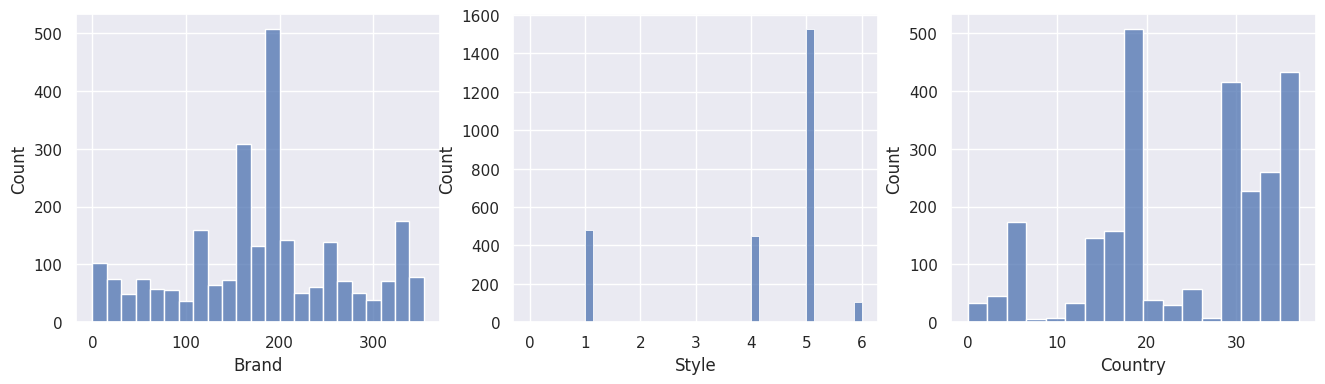

In [93]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.histplot(def_ramen, x="Brand")
plt.subplot(1, 3, 2)
sns.histplot(def_ramen, x="Style")
plt.subplot(1, 3, 3)
sns.histplot(def_ramen, x="Country")

<Axes: xlabel='Country', ylabel='Count'>

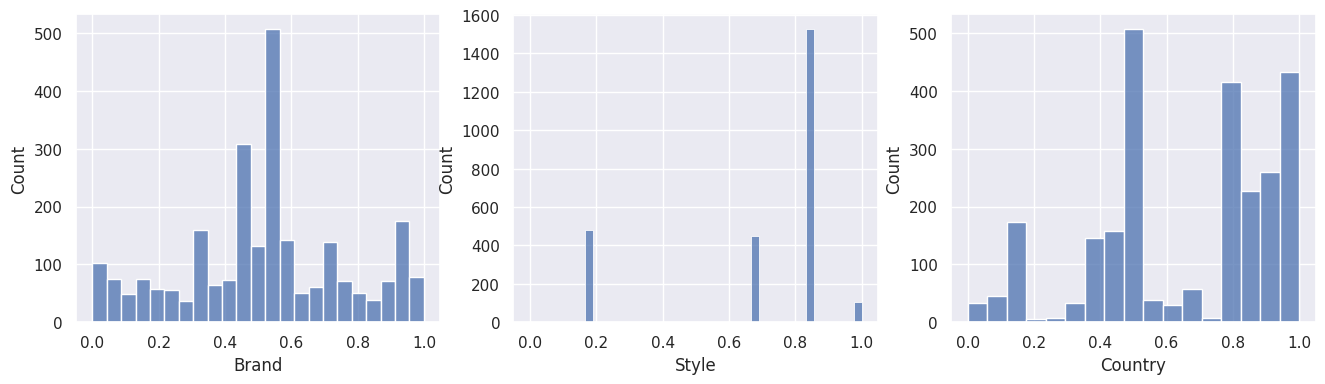

In [94]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.histplot(ramen, x="Brand")
plt.subplot(1, 3, 2)
sns.histplot(ramen, x="Style")
plt.subplot(1, 3, 3)
sns.histplot(ramen, x="Country")